# NAME: Lalitha 

# Project# 1

## Module: Machine Learning

## Project Domain: Healthcare

# CONTEXT:
Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.

# DATA DESCRIPTION:
The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

# PROJECT OBJECTIVE:

Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

## Steps and tasks:

## 1. Import and warehouse data:

    • Import all the given datasets and explore shape and size of each.
    • Merge all datasets onto one and explore final shape and size.

## 2. Data cleansing:

    • Explore and if required correct the datatypes of each attribute
    • Explore for null values in the attributes and if required drop or impute values.
    
## 3. Data analysis & visualisation:

    • Perform detailed statistical analysis on the data.
    • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
      analysis.
      
## 4. Data pre-processing:

    • Segregate predictors vs target attributes
    • Perform normalisation or scaling if required.
    • Check for target balancing. Add your comments.
    • Perform train-test split.
    
## 5. Model training, testing and tuning:

    • Design and train a KNN classifier.
    • Display the classification accuracies for train and test data.
    • Display and explain the classification report in detail.
    • Automate the task of finding best values of K for KNN.
    • Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
      model with your comments for selecting this model.
      
## 6. Conclusion and improvisation:

    • Write your conclusion on the results.
    • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
      collected by the research team to perform a better data analysis in future.


# SOLUTION

# Import and warehouse data:

In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import listdir
import csv

In [619]:
#assigning the working directoruy
file_path=os.getcwd()

In [620]:
#Since the data files are not available in working directory i am reassigning the data path
data_path='C:\AIML\SupervisedLearning'

## • Import all the given datasets and explore shape and size of each

#**We have three files to imported.**

In [621]:
#reading the filename in the folder
#Import and warehouse data:
full_file_names=[f for f in listdir(data_path) if f.startswith('Part1')]
full_file_names

['Part1 - Normal.csv', 'Part1 - Type_H.csv', 'Part1 - Type_S.csv']

# Reading the count of report and size(No.of Column) in each file

In [622]:
#Import all the given datasets and explore shape and size of each.
print("1.Reading CSV and displaying Size and Shape of the each dataset")
file_count = len(full_file_names)
dataframes_list = []
  
# append datasets to the list 
for f in listdir(data_path): 
   if f.startswith('Part1'):
     temp_df = pd.read_csv("C:\AIML\SupervisedLearning\\"+f)
     dataframes_list.append(temp_df)
     print(f," shape -",temp_df.shape) 
     print(f," size -",temp_df.size)


1.Reading CSV and displaying Size and Shape of the each dataset
Part1 - Normal.csv  shape - (100, 7)
Part1 - Normal.csv  size - 700
Part1 - Type_H.csv  shape - (60, 7)
Part1 - Type_H.csv  size - 420
Part1 - Type_S.csv  shape - (150, 7)
Part1 - Type_S.csv  size - 1050


# **Merge all datasets onto one and explore final shape and size**

In [623]:
print('2.Merge all datasets onto one and explore final shape and size')
merged = pd.concat(dataframes_list)
print('Merged Shape- ',merged.shape)
print('Merged Size - ', merged.size)

2.Merge all datasets onto one and explore final shape and size
Merged Shape-  (310, 7)
Merged Size -  2170


# Data cleansing:

## • Explore and if required correct the datatypes of each attribute




In [624]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


### Observation: The data type are correct. There is not need to change the datatype

# **• Explore for null values in the attributes and if required drop or impute values.**

In [625]:
merged.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

### **There are no null values in the tables**


In [626]:
print('Checking the values of Class column')
merged.Class.unique()

Checking the values of Class column


array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

# In the above output, we can see there are Six types of class

**Normal**,

**Nrmal**

**Type_H**

**type_h**

**Type_S**

**Tp_s**

**This seems to be like type error**

**Nrmal is type error and it should be Normal**

**type_h is init Caps error and should be Type_H**

**Tp_S is type error and it is same as Type_S**


### Imputing Incorrect Classes with Original Class Name in the final dataset

**Replacing Nrmal with Normal**

**Replacing type_h with Type_H**

**Replacing Tp_s with Type_S**


In [627]:
merged=merged.replace(to_replace = 'Nrmal', value ='Normal')
merged=merged.replace(to_replace = 'type_h', value ='Type_H')
merged=merged.replace(to_replace = 'tp_s', value ='Type_S')

In [628]:
print('Checking the values of Class column after replace')
merged.Class.unique()

Checking the values of Class column after replace


array(['Normal', 'Type_H', 'Type_S'], dtype=object)

# 3. Data analysis & visualisation:  

#   ## • Perform detailed statistical analysis on the data

In [629]:
print('Exploring the data')
merged.describe()

Exploring the data


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# UniVariant

### Graph show data distribution among the classes

Distribution of data among the class


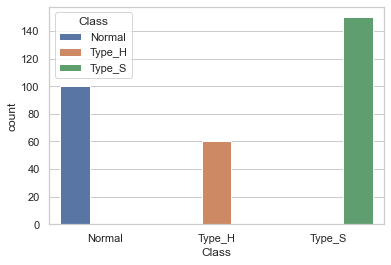

In [652]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="Class", hue= "Class", data=merged)
print('Distribution of data among the class')

# **From the Visualization, can find following information:**

    1. There are 300 sets (rows) in the dataset
    2. There 3 unique classes
    3. Almost 50% (150 rows) dataset consists of class: Type_S 

# • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

# Univariate Analysis using Histogram
# Comparing feature of classes with each other.

In [653]:
normal=merged[merged['Class']=='Normal']
type_h=merged[merged['Class']=='Type_H']
type_s=merged[merged['Class']=='Type_S']
column_list=list(merged.columns[0:7])
column_list

['P_incidence',
 'P_tilt',
 'L_angle',
 'S_slope',
 'P_radius',
 'S_Degree',
 'Class']

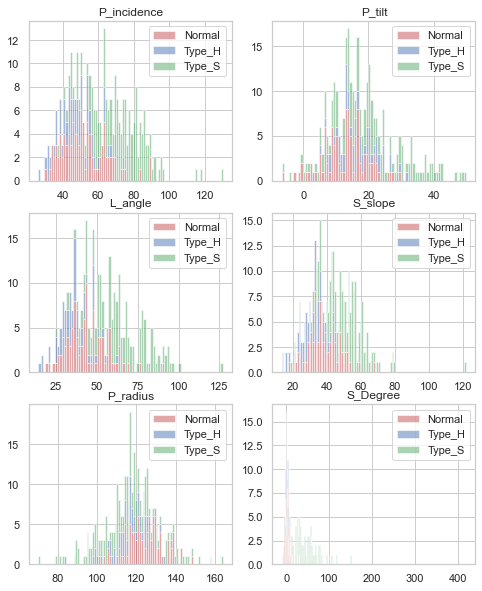

In [656]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(normal[column_list[idx]]) - min(normal[column_list[idx]]))/50
    ax.hist([normal[column_list[idx]],type_h[column_list[idx]],type_s[column_list[idx]]], bins=np.arange(min(merged[column_list[idx]]), max(merged[column_list[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True,label=['Normal','Type_H','Type_S'],color=['r','b','g'])
    ax.legend(loc='upper right')
    ax.set_title(column_list[idx])
#plt.tight_layout()
#plt.show()

**Observation: 

**Above visulization show the comparision of features 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree'in the data provided for three class. **

**This shows values of each feature in comparision with classes **



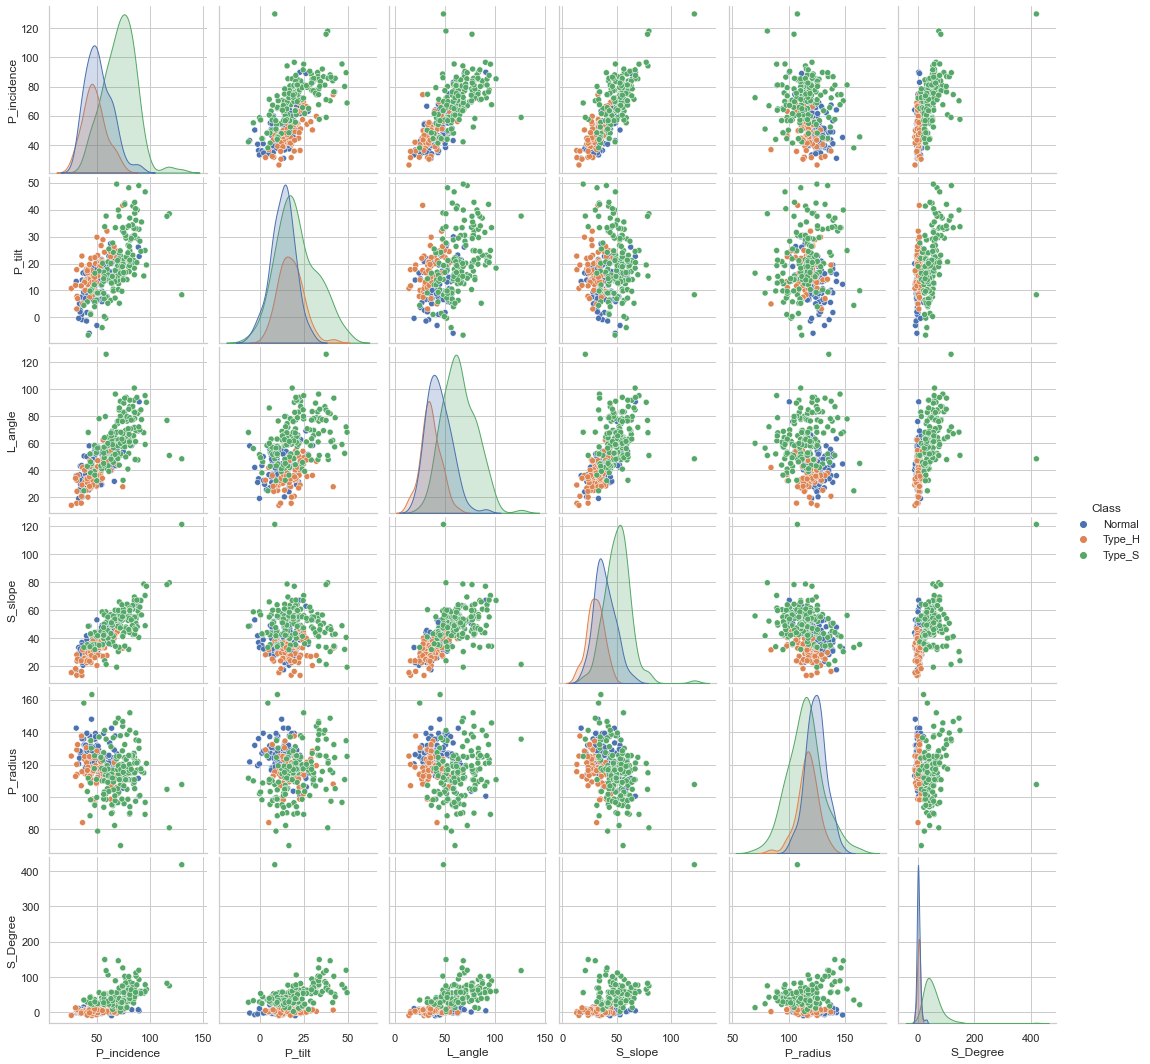

In [633]:
# Multivariate analysis

sns.pairplot(merged,hue='Class')

**Observation: The above graph is the pairplot that show the relation between all the features in the dataframe.**

**Their is a postive co-relation between feature**

**(P_incidence,S_Slope),

**(P_incidence,p_tilt),

**(P_incidence,L_angle)

**(s_slope,l_angle)

**Below grid show the correlation matrix


In [634]:
merged.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


<AxesSubplot:>

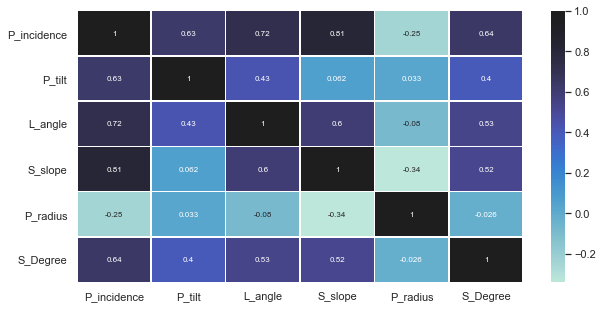

In [635]:
# Heatmap to show the correlation percentage
plt.figure(figsize = (10,5))
sns.heatmap(merged.corr(), annot=True, linewidths=.5,  center = 1 )

# 4. Data pre-processing:
**• Segregate predictors vs target attributes**

**• Perform normalisation or scaling if required.**

**• Check for target balancing. Add your comments.**

**• Perform train-test split**

 #### In the dataset provided **Class** is the target variable and predictors variable are **'P_incidence', 'P_tilt', 'L_angle','S_slope', 'P_radius', 'S_Degree'**

In [637]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

y = merged["Class"]
x = merged.drop(["Class"], axis=1)

# • Perform normalisation or scaling if required.


In [638]:
print("Checking if the Data is normalized")
#merged['Class'].value_counts()
merged['Class'].value_counts(normalize = True)

Checking if the Data is normalized


Type_S    0.483871
Normal    0.322581
Type_H    0.193548
Name: Class, dtype: float64

In [639]:
print('There is imbalance in the data.So we need to applying scaling on data')

There is imbalance in the data.So we need to applying scaling on data


In [706]:
# Scaling
from sklearn.preprocessing import StandardScaler # StandarScaler
scaler = StandardScaler()
scaler.fit(x) 
x_scale = scaler.transform(x)

### Perform train-test split.

In [707]:
X_train, X_test, y_train, y_test = train_test_split(x_scale,y, test_size = 0.3, random_state = 42)
print('Shape of X training data set =',X_train.shape)
print('Shape of Y training data set =',y_train.shape)
print('Percentage of Split for Training:',(len(X_train)/len(merged['Class']))*100)
print('Shape of X test data set =',X_test.shape)
print('Shape of Y test data set =',y_test.shape)
print('Percentage of Split for Test:',(len(X_test)/len(merged['Class']))*100)

Shape of X training data set = (217, 6)
Shape of Y training data set = (217,)
Percentage of Split for Training: 70.0
Shape of X test data set = (93, 6)
Shape of Y test data set = (93,)
Percentage of Split for Test: 30.0


# 5. Model training, testing and tuning:
**• Design and train a KNN classifier.**

**• Display the classification accuracies for train and test data.**

**• Display and explain the classification report in detail.**

**• Automate the task of finding best values of K for KNN.**

**• Apply all the possible tuning techniques to train the best model for the given data.**

**Select the final best trained model with your comments for selecting this model.**

In [708]:
# Designing & Training Model
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors importKNeighborsRegressor for regression
from sklearn.metrics import accuracy_score # similar to .score() -- TP+TN/ all obs
from sklearn.metrics import recall_score, f1_score, classification_report

knn = KNeighborsClassifier(n_neighbors =3) # check with p =1, manhattan score is less

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [709]:
# predict the response on X_test
y_pred = knn.predict(X_test)

# evaluate accuracy
print("Accuracy of Model on Test data (X_test) is: ",accuracy_score(y_test, y_pred))

# Model Accuracy on Training Set
print("Score of X_train & y_train is: ",knn.score(X_train,y_train))

# Model Accuracy on Test Set
print("Score of X_test & y_test is: ",knn.score(X_test, y_test))

Accuracy of Model on Test data (X_test) is:  0.8064516129032258
Score of X_train & y_train is:  0.880184331797235
Score of X_test & y_test is:  0.8064516129032258


In [710]:
print(classification_report(y_pred,y_test)) 

              precision    recall  f1-score   support

      Normal       0.81      0.74      0.78        35
      Type_H       0.58      0.65      0.61        17
      Type_S       0.90      0.93      0.92        41

    accuracy                           0.81        93
   macro avg       0.77      0.77      0.77        93
weighted avg       0.81      0.81      0.81        93



# Observation: 

In the above classification report,
Accuracy of predicting
  Normal is 75%
  Type_H is 58%
  Type_S is 81
 
Recall/Sensitvity (Pecentage of time that the classes are predicted correctly)
 Normal is 65%
 Type_H is 58%
 Type_S is 92%

 Accuary is 74%.

F1 Score : (Weight Average mean since the class are imbalanced)
      Normal: 70%
      Type_H: 58%
      Type_S: 86%
      
The overall model is good for n-neighbour 3. We can observe the accuracy for different neighbour for check how can we increase the F1 Score 

# ## Automate the task of finding best values of K for KNN.

In [711]:
#Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
#classification error
# creating odd list of K for KNN
myList = list(range(3,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
print(neighbors)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


In [712]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors importKNeighborsRegressor for regression
from sklearn.metrics import accuracy_score # similar to .score() -- TP+TN/ all obs
from sklearn.metrics import recall_score, f1_score, classification_report
ac_scores = []
train_accuracy=[]

# perform accuracy metrics for all k values
for k in neighbors: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    tr_accuracy = knn.score(X_train, y_train)
    train_accuracy.append(tr_accuracy)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
    print('Neighbors:', k,' test Accuracy:', scores,'Train Accuary',tr_accuracy)
    print('********************************')

Neighbors: 3  test Accuracy: 0.8064516129032258 Train Accuary 0.880184331797235
********************************
Neighbors: 5  test Accuracy: 0.8279569892473119 Train Accuary 0.815668202764977
********************************
Neighbors: 7  test Accuracy: 0.7741935483870968 Train Accuary 0.8294930875576036
********************************
Neighbors: 9  test Accuracy: 0.8172043010752689 Train Accuary 0.8110599078341014
********************************
Neighbors: 11  test Accuracy: 0.7956989247311828 Train Accuary 0.8018433179723502
********************************
Neighbors: 13  test Accuracy: 0.8494623655913979 Train Accuary 0.783410138248848
********************************
Neighbors: 15  test Accuracy: 0.8387096774193549 Train Accuary 0.7788018433179723
********************************
Neighbors: 17  test Accuracy: 0.8494623655913979 Train Accuary 0.7695852534562212
********************************
Neighbors: 19  test Accuracy: 0.8602150537634409 Train Accuary 0.7788018433179723
*****

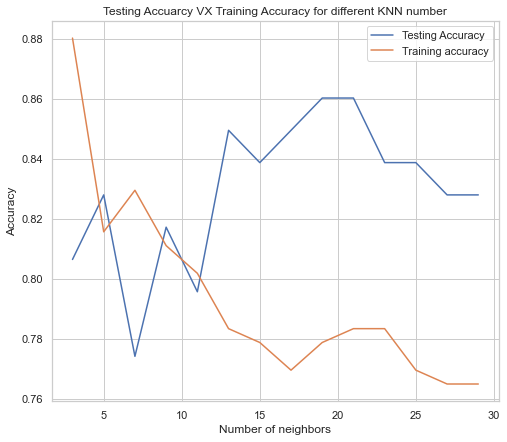

In [713]:
fig = plt.figure(figsize=(8,7))
plt.title('Testing Accuarcy VX Training Accuracy for different KNN number')
plt.plot(neighbors, ac_scores, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# Graphical representation of the accuarcy of Test data and Training data

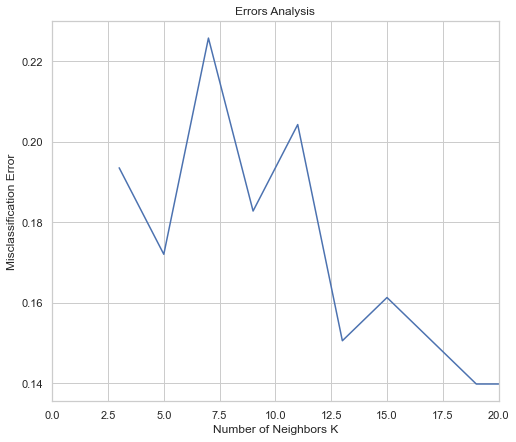

In [714]:
error = [1 - x for x in ac_scores]
import matplotlib.pyplot as plt
# plot misclassification error vs k
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)
plt.plot(neighbors, error)
plt.title('Errors Analysis')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.xlim((0,20))
#ax.set_xticklabels(neighbors)
plt.show()

# Graphical representation of the Error of Test data and Training data

In [715]:
# determining best k - score should be highest or error should be lowest
optimal_k = neighbors[ac_scores.index(max(ac_scores))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 19


# Observation: We can see the optimal K values is 19 and it has provided the accuracy of 86%

**The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.**

## GridsearchCV algorithm has been used to completely automate to findout best K among the different subset splits

In [764]:
# Importing all library 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix

In [765]:
# Applying GridSearch Algorithm to find out Best K, Parameters

X_train_KNC, X_test_KNC, y_train_KNC, y_test_KNC = train_test_split(x_scale,y, test_size = 0.3, random_state = 42)
k_range = list(range(1, 31))
grid_params=dict(n_neighbors=k_range)
gs=GridSearchCV(knn, grid_params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
gs_results=gs.fit(X_train_KNC,y_train_KNC)

mdl_pred=gs_results.predict(X_test_KNC)

# evaluate accuracy
print("Accuracy of Model on testing data(X_test) is: ",accuracy_score(y_test_KNC, mdl_pred))

# Model Accuracy on Training Set
print("Accuracy of Model on training data (X_train) is: ",gs_results.score(X_train_KNC,y_train_KNC))

# Model Accuracy on Test Set
print("Accuracy of Model on X_test and y_test is: ",gs_results.score(X_test_KNC, y_test_KNC))

# Best Model Parameters
print('Best Score : ',gs_results.best_score_)
print(gs_results.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Accuracy of Model on testing data(X_test) is:  0.8279569892473119
Accuracy of Model on training data (X_train) is:  0.815668202764977
Accuracy of Model on X_test and y_test is:  0.8279569892473119
Best Score :  0.7738095238095238
{'n_neighbors': 5}


In [766]:
print(classification_report(y_test_KNC, mdl_pred))

              precision    recall  f1-score   support

      Normal       0.77      0.84      0.81        32
      Type_H       0.75      0.63      0.69        19
      Type_S       0.90      0.90      0.90        42

    accuracy                           0.83        93
   macro avg       0.81      0.79      0.80        93
weighted avg       0.83      0.83      0.83        93



<AxesSubplot:>

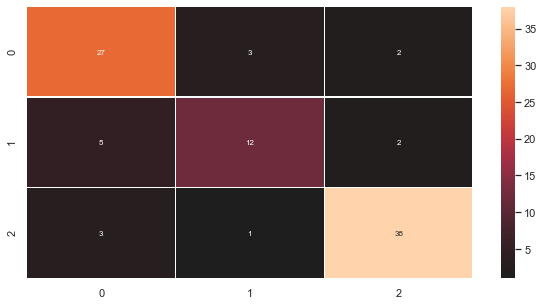

In [721]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, mdl_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,5))
sns.heatmap(df_conf_mat, annot=True, linewidths=.5,  center = 1 )

In [722]:
# Displaying Confusion matrix
conf_mat

array([[27,  3,  2],
       [ 5, 12,  2],
       [ 3,  1, 38]], dtype=int64)

###### In the above display Confusion Metrix for Multi-Class classficiation. 

Observation:

In 32 normal cases, 27 prediction were correct, 3 were predicted as Type_H and 2 were predicted as Type_S

In 19 Type_H cases, 12 prediction were correct, 5 were predicted as Normal and 2 were predicted as Type_S

In 42 Type_S cases, 38 prediction were correct, 3 were predicted as Normal and 1 were predicted as Type_S


# Observation:
 
The data Split has be changed 10 folds and trained. The trained model is used for prediction. 
The above classification report provides the precision,recall and F1-Score. 

We can observe that with the changed in the subset split,the neighbour number also changed.



## Write your conclusion on the results.

## Conclusion:


#### In the above dataset the Class are not properly distributed.

#### At K=19 the score value of X_test and y_test is found maximum than nieghbours values in KNN Model.

#### We used GridSearchCV Algorithm as tuning techniques to train best model of given dataset.

#### In GridSearchCV Algorithm finally we have found that best K=5 and accuracy = 83%, precision = 908%, f1-score=90% and recall=90% for Type_S which are more than the Class 0 and 1.

# • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points 

##  Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future

### Quality:- 

Quality must be evaluated as fit for purpose. the research team use different evaluation methods to obtain high quality of results.

** The data captured is too generalized. The Patient age could also be feature in diagnois the Disease.**

### Quantity:- 

Research team can able to store high Quantity of attributes in the different form of data, like text, picture etc.


**The data collected among the classes are varying.It would give better accuarcy if the data collected would be balanced**

#### Variety:-

Variety in the dataset refers to all the structured and unstructured data that has the possibility of getting generated either by humans or by machines. The most commonly added data are structured in the form of texts, tweets, pictures & videos.Hence the research team pls ensure Variety to be maintained in the dataset, in order to prepaired versatile model by using different algorithms.

### Velocity:- 

Velocity essentially measures how fast the data is coming in, hence the research team pls ensure the data has to be process fastly to obtain fast results.

### Veracity:- 

Data veracity, in general, is how accurate or truthful a data set may be, Hence research team may identify the trustworthy the data source, type etc before processing of it.


# Project# 2

Module: Machine Learning

Project Domain: Banking and finance¶

# CONTEXT:
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit
with same budget as per last campaign.

DATA DESCRIPTION:
The data consists of the following attributes:
The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

# PROJECT OBJECTIVE:

Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

## Steps and tasks:

## 1. Import and warehouse data:

    • Import all the given datasets and explore shape and size of each.
    • Merge all datasets onto one and explore final shape and size.

## 2. Data cleansing:

    • Explore and if required correct the datatypes of each attribute
    • Explore for null values in the attributes and if required drop or impute values.
    
## 3. Data analysis & visualisation:

    • Perform detailed statistical analysis on the data.
    • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
      analysis.
      
## 4. Data pre-processing:

    • Segregate predictors vs target attributes
    • Check for target balancing. Add your comments.
    • Perform train-test split.
    
## 5. Model training, testing and tuning:

    • Design and train a Logistic regression and Naive Bayes classifiers.
    • Display the classification accuracies for train and test data.
    • Display and explain the classification report in detail.
    • Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
      model with your comments for selecting this model.
      
## 6. Conclusion and improvisation:

    • Write your conclusion on the results.
    • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
      collected by the research team to perform a better data analysis in future.


# # SOLUTION

# Import and warehouse data:
**Import all the given datasets and explore shape and size of each.**

In [725]:
# import library files

import numpy             as np     # Package used to dealt with numbers
import pandas            as pd     # Package used for creating Dataframes and work with it
import scipy.stats       as stats  # package used to perform statistical analysis
import matplotlib.pyplot as plt    # Package used for Visualizations 
%matplotlib inline
import seaborn as sns              # Package used for Visualizations

In [727]:
#Import all the given datasets and explore shape and size of each.
print("1.Reading CSV and displaying Size and Shape of the each dataset")
file_count = len(full_file_names)
dataframes_list = []
  
# append datasets to the list 
for f in listdir(data_path): 
   if f.startswith('Part2'):
     temp_df = pd.read_csv("C:\AIML\SupervisedLearning\\"+f)
     dataframes_list.append(temp_df)
     print(f," shape -",temp_df.shape) 
     print(f," size -",temp_df.size)


1.Reading CSV and displaying Size and Shape of the each dataset
Part2 - Data1.csv  shape - (5000, 8)
Part2 - Data1.csv  size - 40000
Part2 -Data2.csv  shape - (5000, 7)
Part2 -Data2.csv  size - 35000


# **Merge all datasets onto one and explore final shape and size**

In [731]:
#Merge all datasets onto one and explore final shape and size
Part2_M = pd.merge(dataframes_list[0], dataframes_list[1],on='ID')
Part2_M.shape

(5000, 14)

# Data cleansing:
**Explore and if required correct the datatypes of each attribute**



In [732]:
Part2_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [733]:
Part2_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


# **Explore for null values in the attributes and if required drop or impute values**

In [734]:
Part2_M.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

### LoanOnCard column has null values. Deleting all the records with null.

In [735]:
Part2_M.drop(Part2_M.index[Part2_M["LoanOnCard"].isnull()],axis=0,inplace=True)
Part2_M['LoanOnCard']=Part2_M['LoanOnCard'].astype(int)
Part2_M.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

### CustomerSince has negative values which is incorrect. CustomerSince cannot be negative, this can be considerd as null values and these records can be removed from the dataset. 

In [736]:
print('Proof of Negative Values')
Part2_M[Part2_M['CustomerSince']<0]

Proof of Negative Values


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,1,0,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,1,0,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,1,0,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,1,0,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,1,0,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,1,0
583,584,24,-1,38,95045,2,1.70,2,0,0,0,1,0,0
597,598,24,-2,125,92835,2,7.20,1,0,1,0,0,1,0
649,650,25,-1,82,92677,4,2.10,3,0,0,0,1,0,0


In [737]:
Part2_M.drop(Part2_M.index[(Part2_M["CustomerSince"]<0)],axis=0,inplace=True)

### Verifying the negative  values are removed

In [738]:
Part2_M['CustomerSince'][Part2_M['CustomerSince']<0]

Series([], Name: CustomerSince, dtype: int64)

In [739]:
Part2_M.shape

(4929, 14)

# Verify the size of the dataframe after data cleaning.

In [740]:
Part2_M.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4929.0,2510.729966,1437.970652,10.0,1269.0,2507.0,3755.0,5000.0
Age,4929.0,45.568269,11.323580,24.0,36.0,46.0,55.0,67.0
CustomerSince,4929.0,20.340840,11.314779,0.0,11.0,20.0,30.0,43.0
HighestSpend,4929.0,73.901603,46.148206,8.0,39.0,64.0,98.0,224.0
ZipCode,4929.0,93151.719821,2128.358534,9307.0,91911.0,93437.0,94608.0,96651.0
HiddenScore,4929.0,2.390952,1.148089,1.0,1.0,2.0,3.0,4.0
MonthlyAverageSpend,4929.0,1.937606,1.749898,0.0,0.7,1.5,2.6,10.0
Level,4929.0,1.879083,0.840089,1.0,1.0,2.0,3.0,3.0
Mortgage,4929.0,56.715358,101.946197,0.0,0.0,0.0,101.0,635.0
Security,4929.0,0.104281,0.305655,0.0,0.0,0.0,0.0,1.0


# 3. Data analysis & visualisation:

**Perform detailed statistical analysis on the data.**

**Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis**

In [741]:
Part2_M.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0


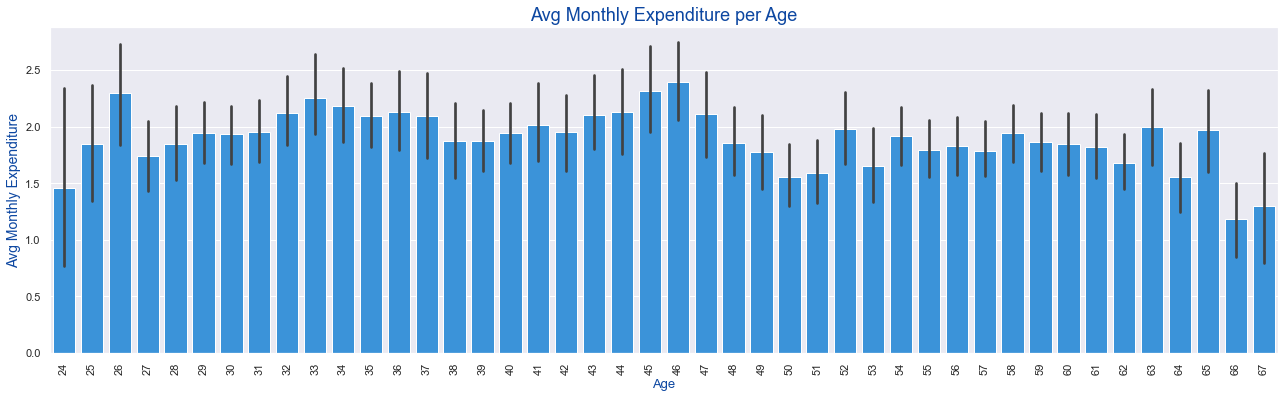

In [458]:
#biVariant Analysis
BB_Data_team = Part2_M[["Age","MonthlyAverageSpend"]]
fig, ax = plt.subplots(figsize=(22,6))
a = sns.barplot(x='Age', y='MonthlyAverageSpend', data=BB_Data_team, ax=ax, color="#2196F3")
ax.set_xlabel('Age', size=13, color="#0D47A1")
ax.set_ylabel('Avg Monthly Expenditure', size=14, color="#0D47A1")
ax.tick_params(axis='x', rotation=90)
ax.set_title('Avg Monthly Expenditure per Age', size=18, color="#0D47A1")
plt.show()

# Above graph shows the distribution of the Avg Monthly expense among the age group.

<AxesSubplot:xlabel='Age', ylabel='MonthlyAverageSpend'>

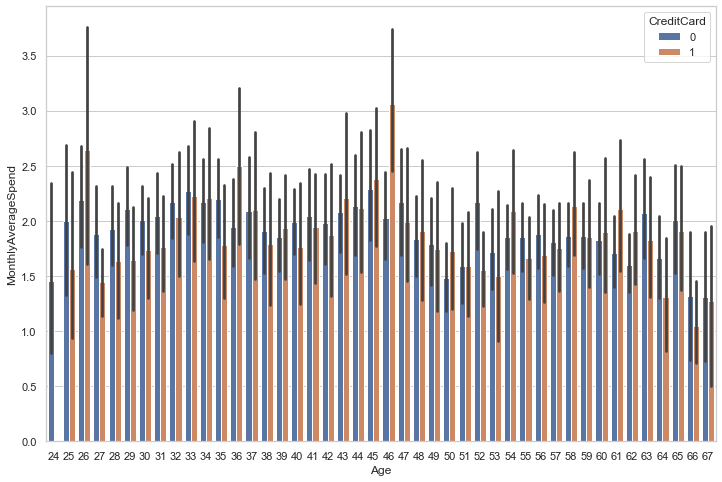

In [745]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.barplot(
    data=Part2_M, x="Age", y="MonthlyAverageSpend", hue="CreditCard"
    #, legend="full"
)

# Above graph shows the distribution of the Avg Monthly expense among the age group and holds are CreditCard.

<AxesSubplot:xlabel='Age', ylabel='MonthlyAverageSpend'>

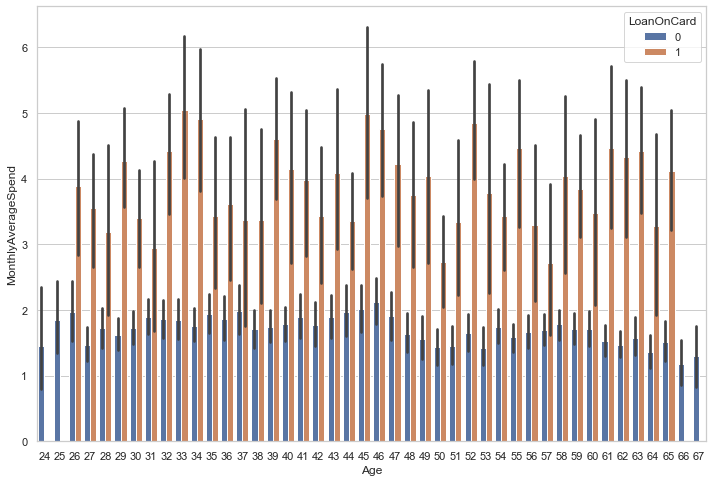

In [746]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.barplot(
    data=Part2_M, x="Age", y="MonthlyAverageSpend", hue="LoanOnCard"
    #, legend="full"
)

# Above graph shows the distribution of the Avg Monthly expense among the age group who hold Loan on Card

<AxesSubplot:xlabel='Age', ylabel='MonthlyAverageSpend'>

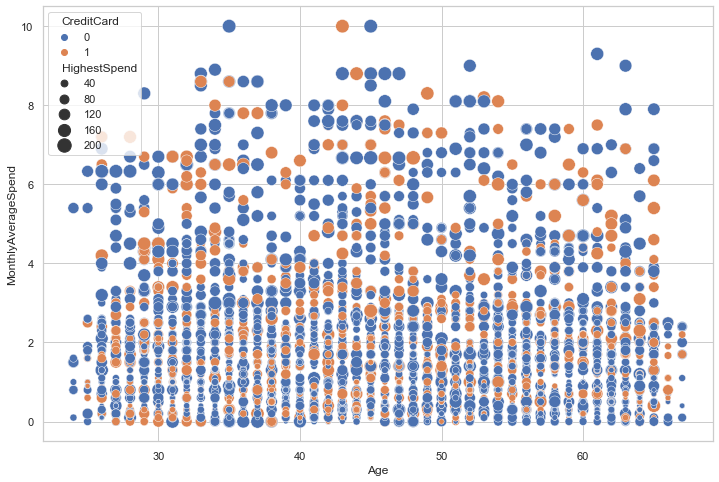

In [744]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(
    data=Part2_M, x="Age", y="MonthlyAverageSpend", hue="CreditCard"
    , size="HighestSpend",sizes=(20, 200)
    #, legend="full"
)

<AxesSubplot:xlabel='Age', ylabel='MonthlyAverageSpend'>

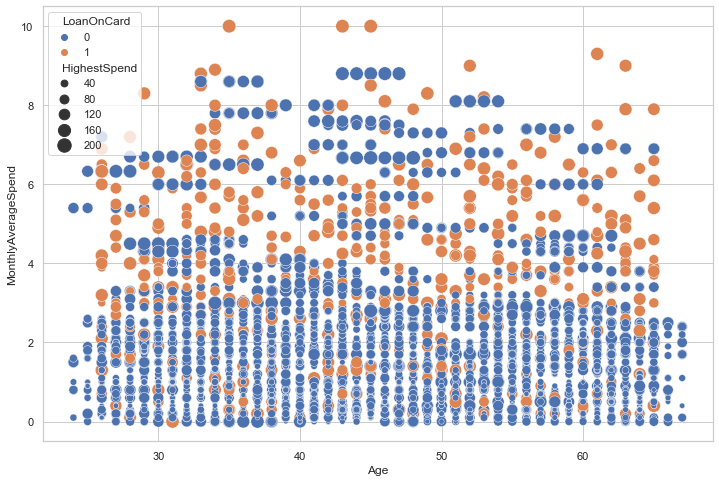

In [589]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(
    data=Part2_M, x="Age", y="MonthlyAverageSpend", hue="LoanOnCard"
    , size="HighestSpend",sizes=(20, 200)
    #, legend="full"
)

### Observation
1. Monthly Average spend is not dependant on age.
2. Monthly Average spend is are age group of customer who has loan on the card.
3. There are customer whose monthly Average spend is more but they dont have a loan on the card.

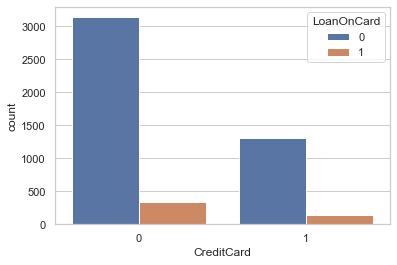

In [590]:
#Univariant Analysis
ax = sns.countplot(x="CreditCard", hue="LoanOnCard", data=Part2_M)

# Observation: Count of customer that has creditcard and do not have creditcard and loanOnCard

Assumption: 0 - No CreditCard

            1 - Have CreditCard
            
            0 - No LoanOnCard
            
            1 - Loan On Card.

In [591]:
#Multivariant Analysus
#Checking the correction between the features in the dataset.
Part2_M.corr()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,1.000000,-0.011573,-0.010993,-0.020614,0.013443,-0.015733,-0.027432,0.021759,-0.012611,-0.019041,-0.008807,-0.002513,0.015457,-0.027432
Age,-0.011573,1.000000,0.994097,-0.058015,-0.030252,-0.038570,-0.050835,0.047179,-0.015750,0.001402,0.003017,0.011436,0.006559,-0.014552
CustomerSince,-0.010993,0.994097,1.000000,-0.049101,-0.029566,-0.044938,-0.048854,0.019174,-0.014086,0.000458,0.005239,0.011355,0.008068,-0.014432
HighestSpend,-0.020614,-0.058015,-0.049101,1.000000,-0.014896,-0.156231,0.646292,-0.189109,0.207234,-0.002049,0.169906,0.014215,-0.004631,0.504293
ZipCode,0.013443,-0.030252,-0.029566,-0.014896,1.000000,0.011733,-0.002958,-0.017137,0.008034,0.005136,0.020157,0.019223,0.007130,0.000229
HiddenScore,-0.015733,-0.038570,-0.044938,-0.156231,0.011733,1.000000,-0.107044,0.065223,-0.021527,0.019112,0.015426,0.008662,0.012537,0.063391
MonthlyAverageSpend,-0.027432,-0.050835,-0.048854,0.646292,-0.002958,-0.107044,1.000000,-0.134757,0.110251,0.012474,0.137450,-0.003388,-0.007197,0.369394
Level,0.021759,0.047179,0.019174,-0.189109,-0.017137,0.065223,-0.134757,1.000000,-0.032230,-0.006203,0.014620,-0.013799,-0.012943,0.138522
Mortgage,-0.012611,-0.015750,-0.014086,0.207234,0.008034,-0.021527,0.110251,-0.032230,1.000000,-0.003261,0.089246,-0.007678,-0.007456,0.142200
Security,-0.019041,0.001402,0.000458,-0.002049,0.005136,0.019112,0.012474,-0.006203,-0.003261,1.000000,0.319718,0.017592,-0.016624,0.022268


<AxesSubplot:>

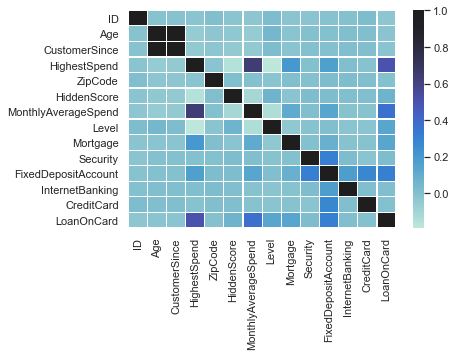

In [592]:
sns.heatmap(Part2_M.corr(), linewidths=.2,  center = 1)

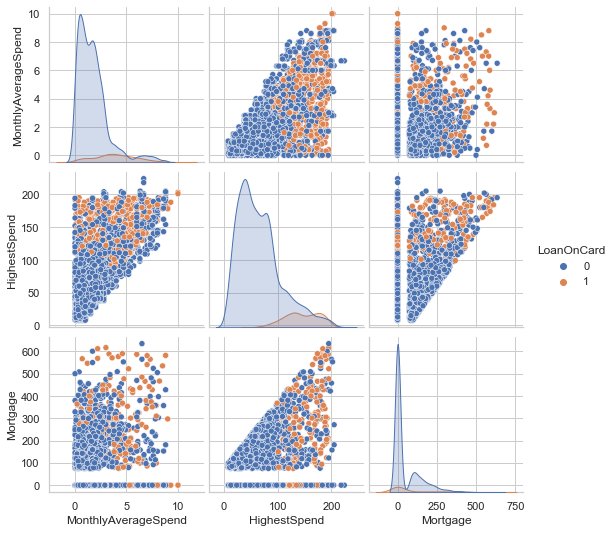

In [593]:
#Subset the data to analysis the co-relation between Highestspend, MonthlyAverageSpend, Mortage of Customer having loan on the Card
new3 = Part2_M[["MonthlyAverageSpend","HighestSpend","Mortgage","LoanOnCard"]]
sns.pairplot(new3,hue='LoanOnCard')


Observation:
1. Customer with loan on the card has more Mortage
2. Customer with loan on the card has thier expenses are more compared with Customer with No Loan on Card.


In [595]:
new4=Part2_M[["HighestSpend","MonthlyAverageSpend","Mortgage","HiddenScore","Security","LoanOnCard"]]
new4.sort_values(['HighestSpend','MonthlyAverageSpend','Mortgage','Security','HiddenScore'],ascending=False).groupby('LoanOnCard').head()

,HighestSpend,MonthlyAverageSpend,Mortgage,HiddenScore,Security,LoanOnCard
3896,224,6.67,0,2,0,0
4993,218,6.67,0,2,0,0
2988,205,8.80,181,2,1,0
526,205,6.33,271,1,0,0
4225,204,8.80,0,2,0,0
2101,203,10.00,0,1,0,1
787,202,10.00,0,3,0,1
2337,201,10.00,0,1,0,1
4282,195,6.33,0,3,1,1
2956,195,5.20,522,4,0,1


# Data pre-processing:

**• Segregate predictors vs target attributes**

**• Check for target balancing and fix it if found imbalanced.**

**• Perform train-test split**


### In the dataset provided **LoanonCard** can be considered as the target variable and predictors variable are rest all are predictor variable.

#### HighestSpend,MonthlyAverageSpend and Mortage expense and liability details. These details can be used to predict if the customer would avail loan.



In [596]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
df=Part2_M[["MonthlyAverageSpend","HighestSpend","Mortgage","LoanOnCard"]]
df

,MonthlyAverageSpend,HighestSpend,Mortgage,LoanOnCard
9,8.9,180,0,1
10,2.4,105,0,0
11,0.1,45,0,0
12,3.8,114,0,0
13,2.5,40,0,0
...,...,...,...,...
4995,1.9,40,0,0
4996,0.4,15,85,0
4997,0.3,24,0,0
4998,0.5,49,0,0


**Check for target balancing and fix it if found imbalanced.**

In [597]:
y_part2 = df["LoanOnCard"]
x_part2 = df.drop(["LoanOnCard"], axis=1)
print("Checking if the Data is normalized")
#merged['Class'].value_counts()
df['LoanOnCard'].value_counts()


Checking if the Data is normalized


0    4449
1     480
Name: LoanOnCard, dtype: int64

# ** In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.Using SMOTE to balance the data

In [747]:
X_train_p2, X_test_p2, y_train_p2, y_test_p2 = train_test_split(x_part2,y_part2, test_size = 0.3, random_state = 40)
print('Shape of X training data set =',X_train_p2.shape)
print('Shape of Y training data set =',y_train_p2.shape)
print('Shape of X test data set =',X_test_p2.shape)
print('Shape of Y test data set =',y_test_p2.shape)

Shape of X training data set = (3450, 3)
Shape of Y training data set = (3450,)
Shape of X test data set = (1479, 3)
Shape of Y test data set = (1479,)


**Output after the balancing the data using SMOTE**

In [748]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train_p2, y_train_p2)

print('Original dataset shape', Counter(y_part2))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 4449, 1: 480})
Resample dataset shape Counter({0: 3123, 1: 3123})


# Model training, testing and tuning:
**• Design and train a Logistic regression and Naive Bayes classifiers.**

**• Display the classification accuracies for train and test data.**

**• Display and explain the classification report in detail.**

**• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model**

**Design and Train Naive Bayes classifiers**

In [749]:
#Design and train Naive Bayes classifiers.
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
clf = GaussianNB()
clf.fit(x_smote, y_smote)
clf.score(x_smote, y_smote)
Y_pred_p2 = clf.predict(X_test_p2)

**Display the classification accuracies for train and test data - NB**

In [750]:
NB_train_accuracy= clf.score(x_smote, y_smote)
NB_test_accuracy=accuracy_score(y_test_p2, Y_pred_p2)
NB_f1 = f1_score(y_test_p2, Y_pred_p2, average='micro')
print('Train data accuary',NB_train_accuracy)
print('Test data accuary',NB_test_accuracy)

Train data accuary 0.8519052193403779
Test data accuary 0.8607167004732927


In [751]:
print(classification_report(y_test_p2,Y_pred_p2))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1326
           1       0.41      0.82      0.55       153

    accuracy                           0.86      1479
   macro avg       0.69      0.84      0.73      1479
weighted avg       0.92      0.86      0.88      1479



# Observation: 

In the above classification report,
Assumption: 0 - customer have not loan
Assumption: 1 - Customer have loan on card

Accuracy of predicting
  0 is 98%
  1 is 41%
 
Recall/Sensitvity (Pecentage of time that the classes are predicted correctly)
  0 is 87%
  1 is 82%

 Accuary is 86%.


F1 Score : (Weight Average mean since the class are imbalanced)
      0: 92%
      1: 55%
      
Since the data is imbalanced, the model is good. 

<AxesSubplot:>

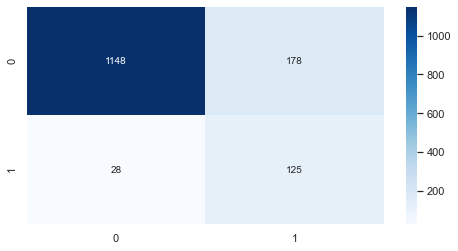

In [752]:
# Displaying confusion matrix to show mis-classifications

conf_mat = confusion_matrix(y_test_p2,Y_pred_p2)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (8,4))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

# Confusion Matrix explanation

In 1326 cases where customer do not have loan , 1148 cases where predicted correctly and 178 were predicted incorrectly.

In 153 cases where customer  have loan , 125 cases where predicted correctly and 28 were predicted incorrectly.


# Logistic Regression

In [753]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logisticRegr = LogisticRegression()
logisticRegr.fit(x_smote, y_smote)
logisticRegr.score(x_smote, y_smote) 
y_pred_log = logisticRegr.predict(X_test_p2)

In [754]:
LG_train_accuracy= logisticRegr.score(x_smote, y_smote)
LG_test_accuracy=accuracy_score(y_test_p2, y_pred_log)
LG_f1 = f1_score(y_test_p2, y_pred_log, average='micro')
print('Train data accuary',LG_train_accuracy)
print('Test data accuary',LG_test_accuracy)

Train data accuary 0.877681716298431
Test data accuary 0.8607167004732927


In [755]:
print(classification_report(y_test_p2,y_pred_log))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1326
           1       0.42      0.89      0.57       153

    accuracy                           0.86      1479
   macro avg       0.70      0.87      0.74      1479
weighted avg       0.93      0.86      0.88      1479



# Observation: 

In the above classification report,
Assumption: 0 - customer have not loan
Assumption: 1 - Customer have loan on card

Accuracy of predicting
  0 is 99%
  
  1 is 42%
 
Recall/Sensitvity (Pecentage of time that the classes are predicted correctly)
  0 is 86%
  
  1 is 89%

 Accuary is 86%.


F1 Score : (Weight Average mean since the class are imbalanced)
      0: 92%
  
      1: 57%
      
Since the data is imbalanced, the model is good. 

<AxesSubplot:>

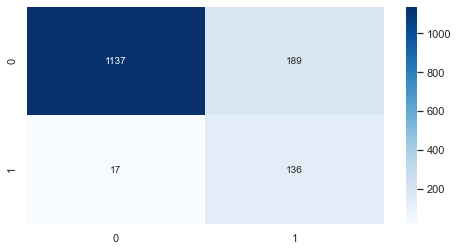

In [756]:
# Displaying confusion matrix to show mis-classifications

conf_mat_lg = confusion_matrix(y_test_p2,y_pred_log)
df_conf_mat = pd.DataFrame(conf_mat_lg)
plt.figure(figsize = (8,4))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

### Confusion Matrix explanation

In 1326 cases where customer do not have loan , 1137 cases where predicted correctly and 189 were predicted incorrectly.

In 153 cases where customer  have loan , 136 cases where predicted correctly and 17 were predicted incorrectly.


# Comparison of resampled model accuracy

In [757]:
Result_comp={'Model':['NB','LG'],
            'Train Accuracy':[NB_train_accuracy,LG_train_accuracy],
           'Test Accuracy':[NB_test_accuracy,LG_test_accuracy],
            'F1_Score':[NB_f1,LG_f1]}
metrics=pd.DataFrame(Result_comp)
metrics

,Model,Train Accuracy,Test Accuracy,F1_Score
0,NB,0.851905,0.860717,0.860717
1,LG,0.877682,0.860717,0.860717


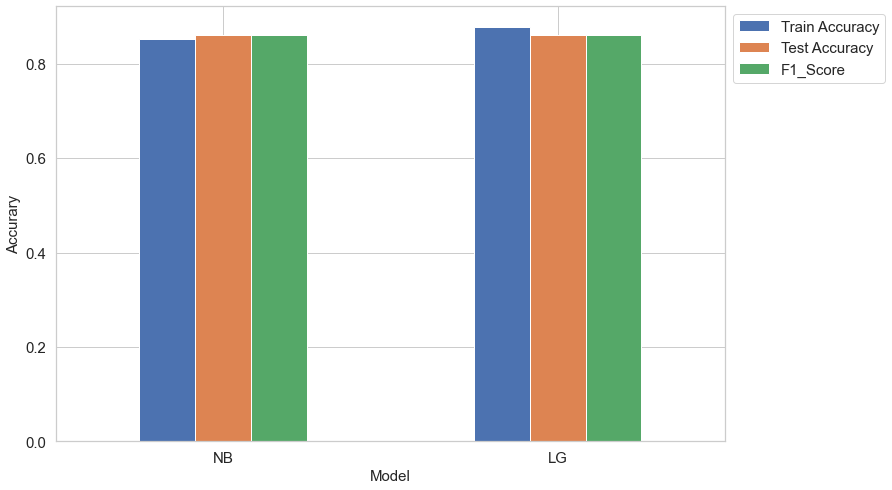

In [758]:
ax = metrics.plot(x='Model',kind='bar', rot=0, figsize = (12,8), fontsize = 15) #, colormap='Paired')
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax.set_ylabel("Accurary", fontsize=15)
ax.set_xlabel("Model", fontsize=15)
plt.show()

## Write your conclusion on the results.

## Conclusion:

###imbalance data
  customer who has loan on the card is only 9% of the data
  Customer who has no loan on the card is 91% of the data.

#### In the above dataset the Class are not properly distributed.

#### To apply the balance the data, smoth is applied. With this both Naive Baye's and Logistic regression acheive the same accuarcy. Refer the above graph for the same.


# • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points 

##  Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future

### Quality:- 

Quality must be evaluated as fit for purpose. the research team use different evaluation methods to obtain high quality of results.

**Data is column Customer Since has negative values which must be data entry/collection issue. This column would never have an entry of negative values**


** Many of the important column like Hidden Score, Security is masked of. These could be not be considered attributes for preduction.**




### Quantity:- 

Research team can able to store high Quantity of attributes in the different form of data, like text, picture etc.

**The data collected are imbalance. The data of customer who do not have any loan are collected then customer who has loan on the card.**


#### Variety:-

Variety in the dataset refers to all the structured and unstructured data that has the possibility of getting generated either by humans or by machines. The most commonly added data are structured in the form of texts, tweets, pictures & videos.Hence the research team pls ensure Variety to be maintained in the dataset, in order to prepaired versatile model by using different algorithms.

** More features should be captured to improve the accuracy of prediction like**

**1. if the customer is salaried/not salaried**

**2. profession.** 

### Velocity:- 

Velocity essentially measures how fast the data is coming in, hence the research team pls ensure the data has to be process fastly to obtain fast results.

### Veracity:- 

Data veracity, in general, is how accurate or truthful a data set may be, Hence research team may identify the trustworthy the data source, type etc before processing of it.
